In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing

##Data Loading

In [3]:
NIFTY = pd.read_csv("Database/NIFTY50DATASETfinal.csv")

##NIFTY50

In [6]:
NIFTY.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,29-Dec-2014,8214.7,8279.15,8214.70,8246.30,82086035,3340.07
1,30-Dec-2014,8260.3,8268.25,8220.55,8248.25,77695770,3460.46
2,31-Dec-2014,8243.9,8291.00,8243.75,8282.70,84532600,4221.32
3,01-Jan-2015,8272.8,8294.70,8248.75,8284.00,56560411,2321.88
4,02-Jan-2015,8288.7,8410.60,8288.70,8395.45,101887024,4715.72


In [7]:
NIFTY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1383 non-null   object 
 1   Open               1383 non-null   float64
 2   High               1383 non-null   float64
 3   Low                1383 non-null   float64
 4   Close              1383 non-null   float64
 5   Shares Traded      1383 non-null   int64  
 6   Turnover (Rs. Cr)  1383 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 75.8+ KB


In [8]:
# Drop NULL rows
NIFTY.dropna(inplace = True)

In [9]:
# Change Dtype of Columns
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])
NIFTY["Volume"] = NIFTY["Shares Traded"]
NIFTY = NIFTY.astype({"Open": float, "Volume": float})

In [10]:
# Change Dtype of Columns
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])
NIFTY["Volume"] = NIFTY["Shares Traded"]
NIFTY = NIFTY.astype({"Open": float, "Volume": float})

In [11]:
# Sort the Database by Date
NIFTY = NIFTY.sort_values(by = 'Date', ignore_index = True)

In [12]:
# Drop rows having Date < '2015-01-01'
NIFTY = NIFTY[NIFTY["Date"] >= '2015-01-01'].reset_index(drop = True)

In [13]:
NIFTY.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volume
count,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03
mean,9724.100471,9769.856051,9659.171268,9714.041304,3.116607e+08,13855.290304,3.116607e+08
std,1412.883044,1413.085644,1408.592821,1410.344265,2.124308e+08,7887.523742,2.124308e+08
min,7023.650000,7034.200000,6825.800000,6970.600000,1.661087e+07,805.890000,1.661087e+07
25%,8437.237500,8487.562500,8379.987500,8433.725000,1.745164e+08,8261.185000,1.745164e+08
50%,9863.750000,9900.600000,9783.700000,9858.275000,2.267393e+08,11112.855000,2.267393e+08
75%,10865.062500,10908.912500,10794.550000,10855.237500,3.730761e+08,17332.287500,3.730761e+08
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,59705.530000,1.811564e+09


In [14]:

# saving the dataframe
NIFTY.to_csv('Database/Pre_Processed_NIFTY50.csv')

#Exploratory Data Analysis

In [15]:
Companies = [NIFTY]
Companies_Title = ["NIFTY50"]

Text(0, 0.5, 'Close')

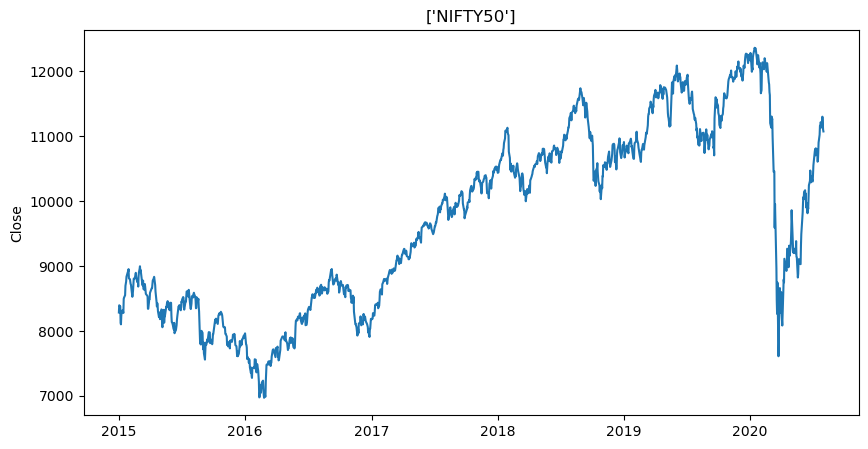

In [16]:
# Lets view historical view of the closing prices

plt.figure(figsize=(10,5))
# for index, company in enumerate(Companies):
#   # plt.subplot(3, 2, index + 1)
plt.plot(NIFTY["Date"], NIFTY["Close"])
plt.title(Companies_Title)
plt.ylabel('Close')

Text(0, 0.5, 'Volume')

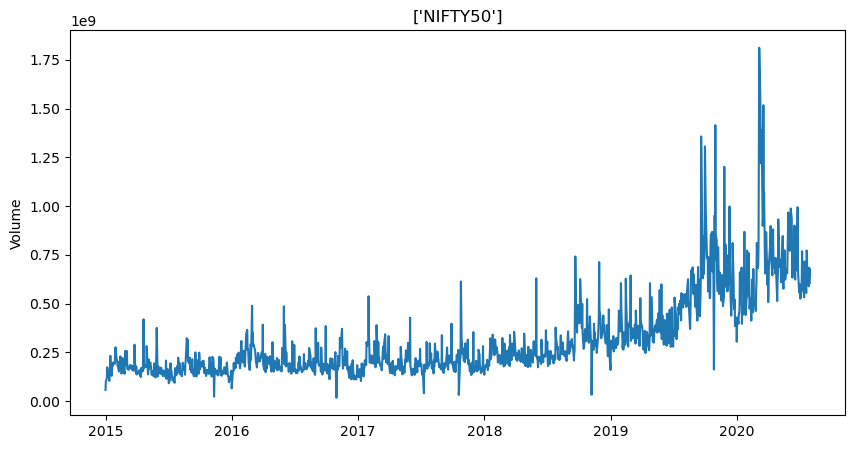

In [18]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(10,5))
# for index, company in enumerate(Companies):
#   plt.subplot(3, 2, index + 1)
plt.plot(NIFTY["Date"], NIFTY["Volume"])
plt.title(Companies_Title)
plt.ylabel('Volume')

Now, we have seen the visualizations for the closing price and volume traded each day, let's go ahead and calculate the moving average of the stock.

### What was the moving average of the various stocks ?

In [19]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Close"].rolling(Moving_Average).mean()

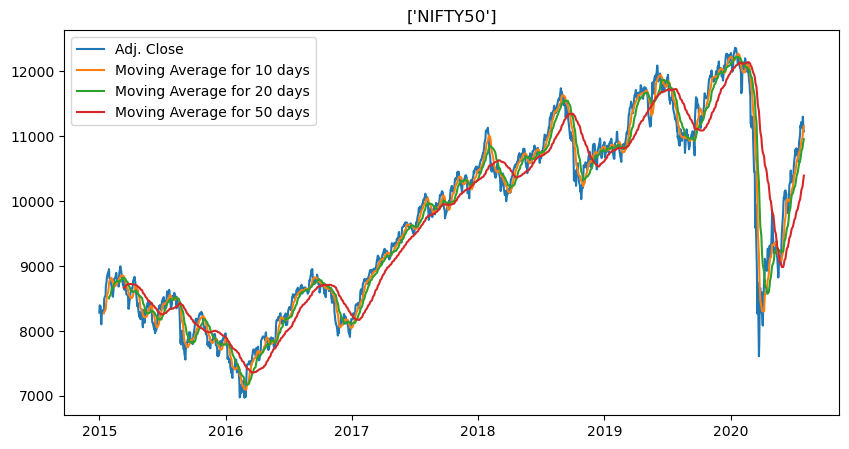

In [22]:
plt.figure(figsize=(10,5))
# for index, company in enumerate(Companies):
#   plt.subplot(3, 2, index + 1)
plt.plot(company["Date"], company["Close"])
plt.plot(company["Date"], company["Moving Average for 10 days"])
plt.plot(company["Date"], company["Moving Average for 20 days"])
plt.plot(company["Date"], company["Moving Average for 50 days"])
plt.title(Companies_Title)
plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [23]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 

for company in Companies:
  company["Daily Return"] = company["Close"].pct_change()

Text(0, 0.5, 'Daily Return')

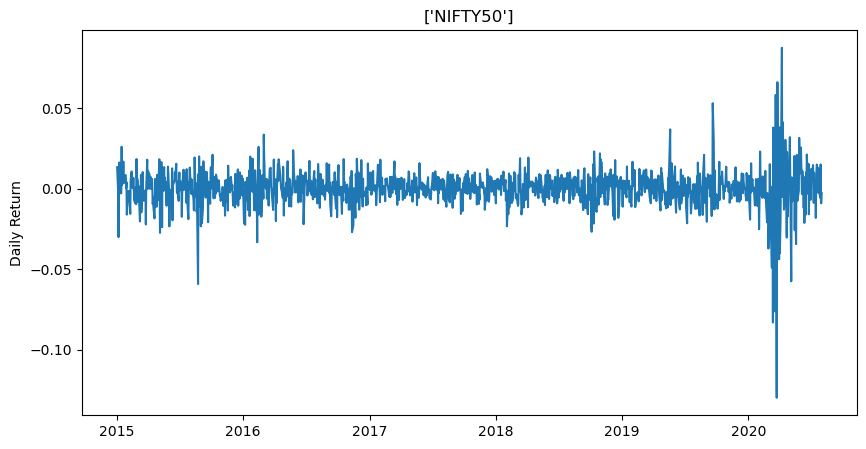

In [24]:
plt.figure(figsize=(10,5))
# for index, company in enumerate(Companies):
#   plt.subplot(3, 2, index + 1)
plt.plot(company["Date"], company["Daily Return"])
plt.title(Companies_Title)
plt.ylabel('Daily Return')

Now, let's get an overall at the average daily return using a histogram.

Text(0.5, 1.0, "['NIFTY50']")

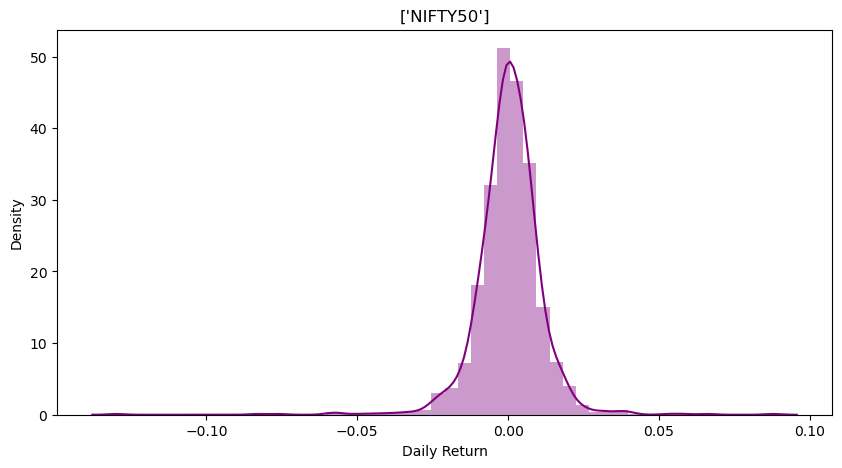

In [26]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
# for index, company in enumerate(Companies):
#   plt.subplot(3, 2, index + 1)
sns.distplot(company["Daily Return"].dropna(), color = "purple")
plt.title(Companies_Title)

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [27]:
print("Kurtosis Value")
# for index, company in enumerate(Companies):
print(f'{Companies_Title}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
['NIFTY50']: 21.478697259471375


The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

### What was the correlation between diffrent stocks closing price ?

In [35]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["NIFTY50"] = NIFTY["Close"]
Companies_returns.head()

,NIFTY50
0,8284.00
1,8395.45
2,8378.40
3,8127.35
4,8102.10


In [36]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,NIFTY50
0,NaN
1,0.013454
2,-0.002031
3,-0.029964
4,-0.003107


Now, let's do a correlation plot, to get actual numerical values for the correlation between the stocks closing price

In [30]:
# sns.heatmap(Companies_returns.corr(), annot=True, cmap="YlGnBu")

Finally, let's do a correlation plot, to get actual numerical values for the correlation between the stocks daily returns.

In [31]:
# sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="YlGnBu")

From the above plot, we can see that Microsoft and Google had the strongest correlation in stocks daily returns.

### How much value do we put at risk by investing in a paticular stock ?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

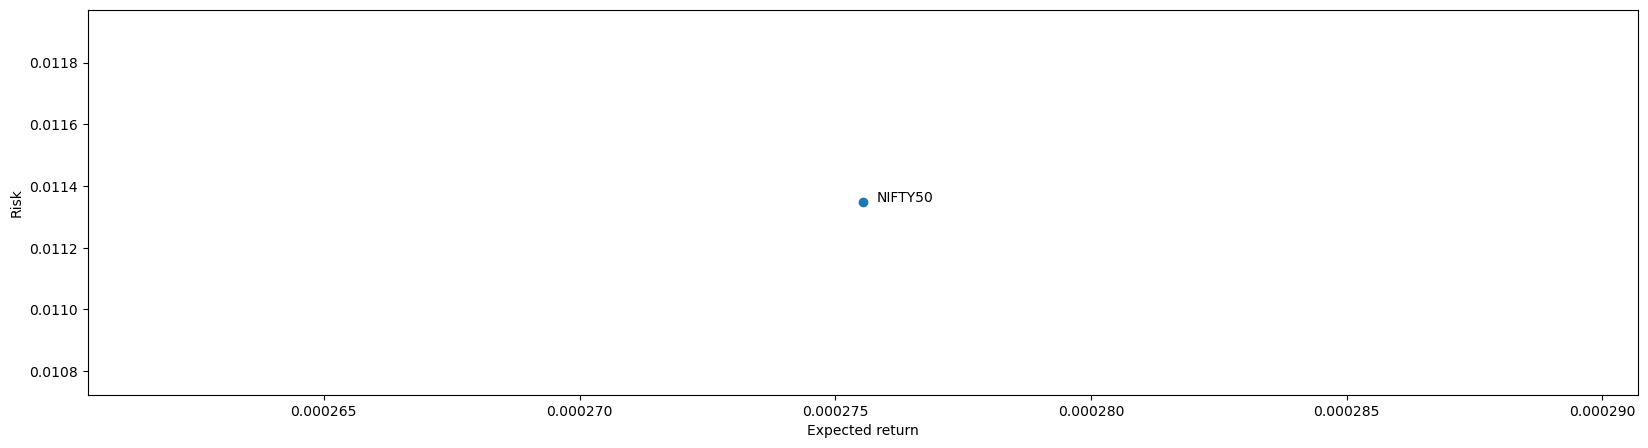

In [37]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies_Title, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')